In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [21]:
# read data
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [22]:
def linearPlot(x, y, title):
  plt.scatter(x, y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt.show()

In [23]:
def polynomialPlot(x, y, yhat, title, index):
  plt.figure(index)
  plt.scatter(x, y, label = 'Actual')
  plt.legend()
  plt.scatter(x, yhat, label = 'Predicted')
  plt.legend()
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(title)
  plt.show(index)

(5000, 2)


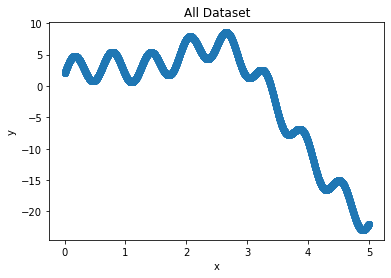

In [24]:
# plot data
data = np.array(data)
# shuffle
np.random.shuffle(data)
print(data.shape)

X, Y = data[:,0], data[:,1]

linearPlot(X, Y, 'All Dataset')

In [25]:
# split data into 10 folds
folds = 10
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.10, random_state= 10)
Xfolds = np.array_split(Xtrain, folds)
Yfolds = np.array_split(Ytrain, folds)

In [26]:
def trainingOnAllFolds(Xfolds, Yfolds, poly):

  models = []
  length = len(Xfolds)

  for i in range(length):

    f = poly.fit_transform(Xfolds[i].reshape(-1,1))

    model = LinearRegression()
    model.fit(f, Yfolds[i])

    models.append(model)
      
  return models

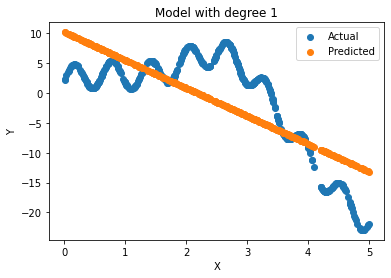

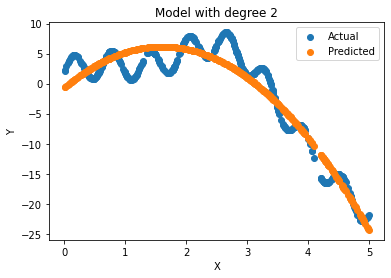

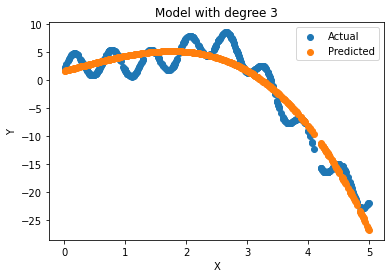

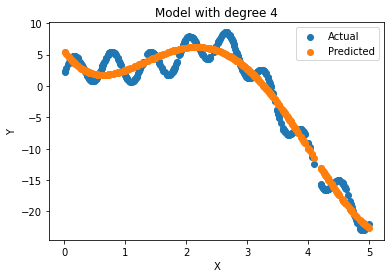

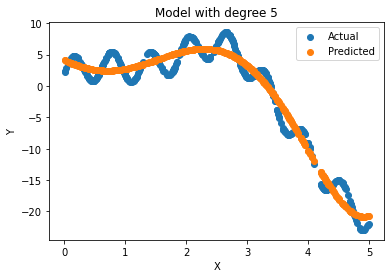

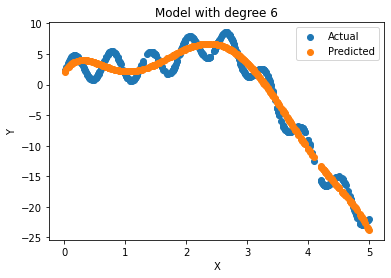

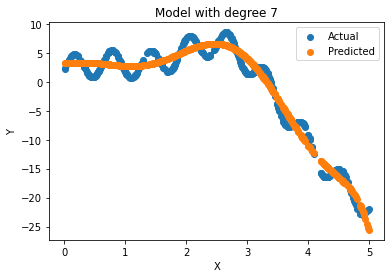

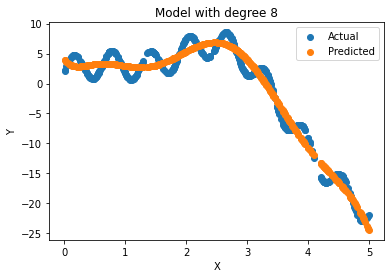

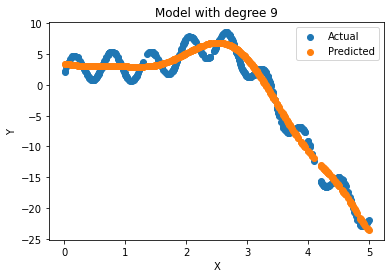

In [27]:
Xtest = Xtest.reshape(-1, 1)
Ytest = Ytest.reshape(-1, 1)

score_df = pd.DataFrame(columns=['Degree', 'Bias', 'Bias Square', 'Variance', 'MSE', 'Irreducible Error', 'Error'])
all_degree = []
all_bias = []
all_bias_square = []
all_variance = []
all_mse = []
all_irreducible_error = []
all_error = []

for degree in range(1, 10):
  # create the polynomial function with degree from 1 to 9
  poly = PolynomialFeatures(degree)

  # create a list of models with this polynomial function
  models = trainingOnAllFolds(Xfolds, Yfolds, poly)

  df = pd.DataFrame(Ytest, columns=['Actual'])
  # check the models with the Xtest data to get the Yhat
  for (index, model) in enumerate(models):
    # transform Xtest before prediction so Xtest fit the dimensions of polynomial function
    XtestTransformed = poly.fit_transform(Xtest)
    # predict Yhat
    Yhat = model.predict(XtestTransformed)
    # tabular models data
    df['Model ' + str(index + 1)] = Yhat

  all_degree.append(degree)

  # plot the last model
  title = 'Model with degree ' + str(degree)
  polynomialPlot(Xtest, Ytest, Yhat, title, degree)

  actual = np.array(df['Actual']).reshape(-1, 1)
  # 10 columns of 10 models of 9 different datasets
  predictions = np.array(df.iloc[:, 1:])

  # average of 10 predictions over 10 models
  df['Prediction AVG'] = np.mean(predictions, axis = 1)
  predictionAVG = np.array(df['Prediction AVG']).reshape(-1, 1)

  # difference between prediction (500,9) and actual (500,1) values
  diff =  predictionAVG - actual
  # ABS Bias
  bias = np.mean(np.abs(diff))
  # Square Bias
  bias_square = np.mean(np.power(diff, 2))
  # Variance
  variance = np.mean(np.power(predictions - predictionAVG, 2))
  # Mean Square Error
  mse = np.mean(np.power(actual - predictionAVG, 2))
  # Irreducible Error
  irreducible_error = mse - (bias_square + variance)
  # Error
  error = bias_square + variance + mse
  # append to lists
  all_bias.append(bias)
  all_bias_square.append(bias_square)
  all_variance.append(variance)
  all_mse.append(mse)
  all_irreducible_error.append(irreducible_error)
  all_error.append(error)

score_df['Degree'] = all_degree
score_df['Bias'] = all_bias
score_df['Bias Square'] = all_bias_square
score_df['Variance'] = all_variance
score_df['MSE'] = all_mse
score_df['Irreducible Error'] = all_irreducible_error
score_df['Error'] = all_error

In [28]:
score_df

,Degree,Bias,Bias Square,Variance,MSE,Irreducible Error,Error
0,1,4.965953,32.782023,0.107340,32.782023,-0.107340,65.671387
1,2,1.998264,5.946307,0.031816,5.946307,-0.031816,11.924429
2,3,1.875232,5.184041,0.032145,5.184041,-0.032145,10.400228
3,4,1.482018,3.118058,0.026719,3.118058,-0.026719,6.262835
4,5,1.484034,2.946168,0.031815,2.946168,-0.031815,5.924150
5,6,1.438625,2.670530,0.032872,2.670530,-0.032872,5.373931
6,7,1.409964,2.515787,0.042675,2.515787,-0.042675,5.074250
7,8,1.408741,2.488799,0.044658,2.488799,-0.044658,5.022257
8,9,1.409569,2.499752,0.047314,2.499752,-0.047314,5.046818


In [29]:
def customPlot(col, title):
  plt.plot(score_df['Degree'], score_df[col], color = 'green')
  plt.title(title)
  plt.xlabel('Degree') 
  plt.ylabel(col)
  plt.legend([col])
  plt.show()

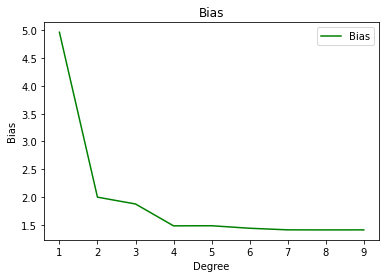

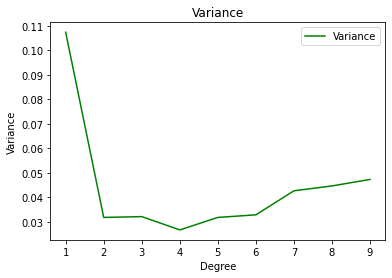

In [30]:
customPlot('Bias', 'Bias')
customPlot('Variance', 'Variance')

# Report
As Shown in the plots above:
1.   The Bias decrease.
2.   The minimum variance is on degree 4.

So the trade off between the bias and variance is Degree d = 4.

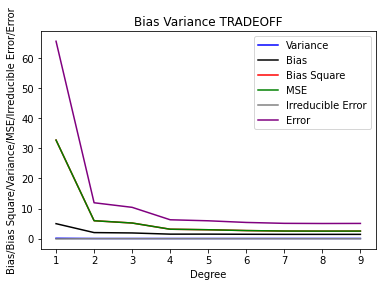

In [31]:
plt.plot(score_df['Degree'], score_df['Variance'], color = 'blue')
plt.plot(score_df['Degree'], score_df['Bias'], color = 'black')
plt.plot(score_df['Degree'], score_df['Bias Square'], color = 'red')
plt.plot(score_df['Degree'], score_df['MSE'], color = 'green')
plt.plot(score_df['Degree'], score_df['Irreducible Error'], color = 'gray')
plt.plot(score_df['Degree'], score_df['Error'], color = 'purple')
plt.title('Bias Variance TRADEOFF')
plt.xlabel('Degree') 
plt.ylabel('Bias/Bias Square/Variance/MSE/Irreducible Error/Error')
plt.legend(['Variance', 'Bias', 'Bias Square', 'MSE', 'Irreducible Error', 'Error'])
plt.show()